# Описательная статистика. Меры центральной тенденции в Python

Когда вы описываете и вычисляете характеристики одной переменной, вы выполняете **`одномерный анализ`**. 

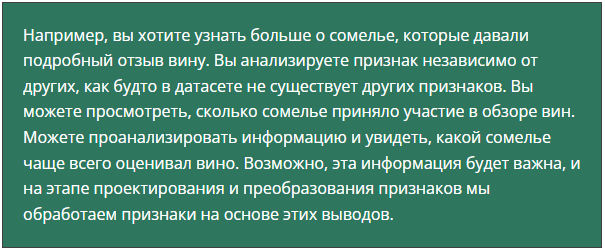

Когда вы анализируете пару переменных и больше, то вы делаете **`многомерный анализ`**. Целью такого анализа является нахождение связей между признаками. 

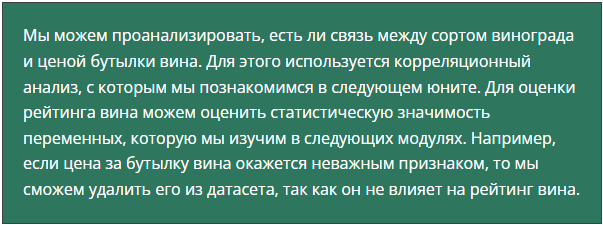

К одномерному анализу вы можете отнести вычисление максимальных и минимальных значений какого-либо признака, вычисление средних значений, часто встречающихся значений и размаха. 

In [1]:
import pandas as pd

In [1]:
data = pd.read_csv('data\wine_cleared.csv')
df = data.copy()

NameError: name 'pd' is not defined

In [3]:
#Вычислите наименьший балл за вино в датасете.

df['points'].min()

80

In [4]:
#Вычислите наименьшую цену за бутылку в наборе данных.

df['price'].min()

4.0

**`Вычисление среднего`** также относится к одномерному анализу. Но что значит среднее?

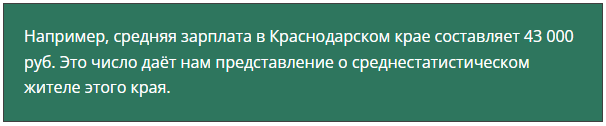 

Но что здесь означает средняя зарплата и среднестатистический житель? Среднее арифметическое, середина распределения или что-то другое? Чтобы ответить на этот вопрос, нам необходимо знать, что такое мера центральной тенденции.

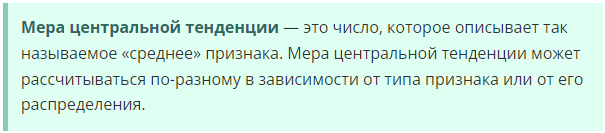

Далее мы рассмотрим наиболее популярные меры центральной тенденции, используемые в машинном обучении: среднее арифметическое, медиана, мода. Для расчёта этих описательных статистик в Python мы будем пользоваться библиотекой [statistics](https://docs.python.org/3/library/statistics.html). Она предоставляет готовые функции для вычисления математической статистики для числовых данных.

Установим библиотеку:

**`pip install statistics`**

Импортируем библиотеку для дальнейшего использования:

**`import statistics`**

In [5]:
import statistics

### СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ

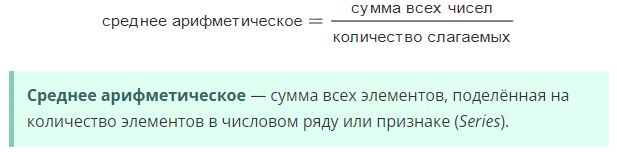

In [7]:
#Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics.

round(statistics.mean(df['price']),2)

35.36

In [10]:
mean = sum(data['price']) / len(data['price'])
mean

35.36338912999136

In [11]:
#Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics

round(statistics.median(df['price']),2)

28.0

In [26]:
a = df['price'].sort_values()
a.median()

28.0

In [27]:
count_price = len(data['price']) # количество записей цен
sorted_price = sorted(data['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

В случае, когда количество элементов чётное, у нас получается два средних значения:

* median_low() возвращает меньшее из них;
* median_high() возвращает большее из них.

**Примечание**. Если в вашем наборе данных есть пропущенные значения, функции библиотеки `statistics` в отличие от других методов (например `np.median()` из библиотеки `numpy`) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.

### МОДА

**`Мода`** — самое часто встречающееся значение в числовом или нечисловом ряду данных.

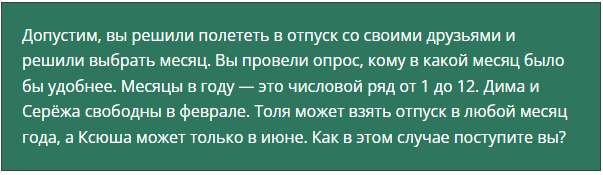

Очевидно, выберете месяц, который выбрало большинство; остальные подстроятся либо не полетят с вами.

Чаще всего мода используется **`в нечисловых рядах`**. Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.

In [29]:
round(statistics.mode(df['price']),2)

35.36

In [42]:
mode = round(df["price"].value_counts().index[0],2)
mode

35.36

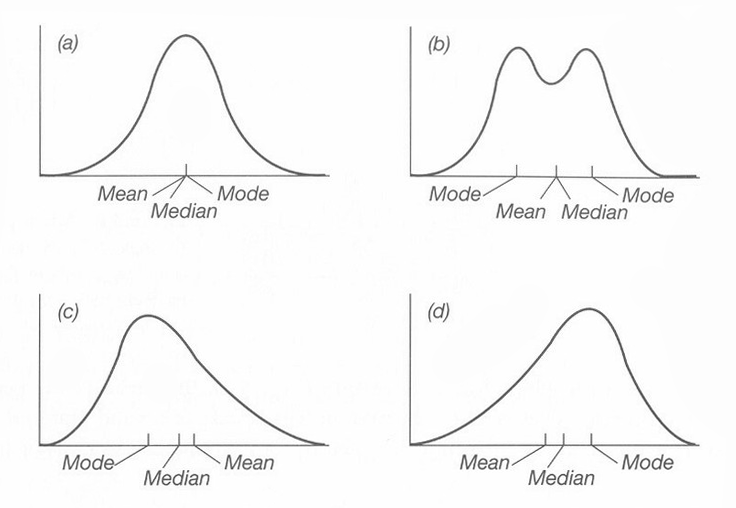
На этих схематических графиках показано, как могут выглядеть гистограммы с различными формами распределения. На графиках a и b — симметричные распределения, c и d — несимметричные.

Мы рассмотрели самые основные и часто используемые в машинном обучении меры центральной тенденции. Также к мерам центральной тенденции относятся:

* среднее геометрическое;
* среднее гармоническое;
* средневзвешенное и другие.

Их также можно вычислить с помощью библиотеки statistics, но они реже используются для описания распределения в машинном обучении.

Такие более сложные описательные статистики, как стандартное отклонение, меры разброса, вы изучите в следующих юнитах, посвящённых математической статистике.